<center>
<br>
<br>
<font size=6>Mushroom Classification</font><br>
<br>
<br>
<font size=5>О наборе <a href='https://www.kaggle.com/datasets/uciml/mushroom-classification'>данных</a></font><br>
<br>
<br>
<font size=4><b>Контекст</b></font><br>
Хотя этот набор данных был первоначально добавлен в репозиторий машинного обучения UCI почти 30 лет назад, охота за грибами (также известная как «гриб») переживает новый пик популярности.<br>
Узнайте, какие особенности означают верную смерть, а какие наиболее приятны в этом наборе данных о характеристиках грибов.<br>
И насколько уверенной может быть ваша модель?<br>
<br>
<font size=4><b>Содержание</b></font><br>
Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам жаберных грибов семейства Agaricus и Lepiota, взятых из Полевого справочника Общества Одюбона по североамериканским грибам (1981). Каждый вид определяется как определенно съедобный, определенно ядовитый или съедобный неизвестного вида и не рекомендуется. Этот последний класс был объединен с ядовитым. В Руководстве четко указано, что простого правила для определения съедобности гриба не существует; никаких правил типа «листовки три, пусть будет» для Ядовитого Дуба и Плюща.<br>
<br></center>
<img src='data/mushroom.jpg' width=250><br>

<br>
<font size=6> Эпизод I</font>
<br>
<br>
<br>
<font size=5>Исследование</font><br>
<hr>

<br>
<font size=4>Загрузка данных</font><br>
<br>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/mushrooms.csv')

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<br>
<font size=4>Разберемся подробней с данными</font><br>
<br>

<b>Признак class</b>:
 - (p) poisonous - ядовитый
 - (e) edible - съедобный
<br><br>

<b>Признак cap-shape</b>:
 - (b) bell - колокол
 - (c) conical - конический
 - (x) convex - дугообразный
 - (f) flat - плоский 
 - (k) knobbed - выпуклый
 - (s) sunken - запавший
 <br><br>
 
 
 <b>Признак cap-surface</b>:
  - (f) fibrous - волокнистый
  - (g) grooves - выемка
  - (y) scaly - чешуйчатый
  - (s) smooth - гладкий
 <br><br> 
  
 
 <b>Признак odor (запах):</b>
 - (а) almond - миндальный
 - (l) anise  - анис
 - (с) creosote - креозот
 - (y) fishy - рыбный
 - (f) foul - грязный
 - (m) musty - затхлый
 - (n) none - нет
 - (p) pungent - острый
 - (s) spicy - пряный
 <br><br>
 
 
 <b>Признак gill-attachment (жабереное присоединение):</b>
 - (a) attachment - прикрепленный
 - (d) descending - нисходящий
 - (f) free - свободный
 - (n) notched - зубчатый
 <br><br>
 
 
 <b>Признак gill-spacing (расстояние между жабрами):</b> 
 - (c) close - близко
 - (w) crowded - притиснуто
 - (d) distant - далеко
 <br><br>
 
 
 <b>Признак gill-size (размер жабр):</b> 
  - (b) board широкий
  - (n) narrow узкий
  <br><br> 
  
<b>Призак stalk-shape:</b>
 - (e) enlarging - увеличение,
 - (t) tapering - сужение 
 <br><br>

<b>Признак stalk-root:</b>
 - (b) bulbous - луковичный
 - (c) club
 - (u) cup - чашка
 - (e) equal
 - (z) rhizomorphs - ризоморфы
 - (r) rooted - укорененный
 - (?) missing
 <br><br>

<b>Признак stalk-surface-above-ring:</b>
 - (f) fibrous - волокнистый
 - (y) scaly - чешуйчатый
 - (k) silky - шелковистый
 - (s) smooth - гладкий
 <br><br>

<b>stalk-surface-below-ring:</b>
 - (f) fibrous - волокнистый
 - (y) scaly - чешуйчатый
 - (k) silky - шелковистый
 - (s) smooth - гладкий
<br><br>

<b>veil-type:</b>
 - (p) partial - частичное
 - (u) universal - универсальный
<br><br>

<b>ring-number (количество колец):</b>
 - (n) none
 - (o) one
 - (t) two
<br><br>

<b>ring-type: </b> 
 - (c) cobwebby - паутина
 - (e) evanescent
 - (f) flaring - пылающий
 - (l) large - большой
 - (n) none 
 - (p) pendant - кулон
 - (s) sheathing - обшивка
 - (z) zone
<br><br>

<b>Признак population:</b>
 - (a) abundant - обильный
 - (c) clustered - сгруппированный
 - (n) numerous - многочисленный
 - (s) scattered - рассеянные
 - (v) several - несколько
 - (y) solitary - одиночные
<br><br>

<b>Признак habitat (среда обитания):</b>
 - (g) grasses - травы
 - (l) leaves - листья
 - (m) meadows - луга
 - (p) paths - тропы
 - (u) urban - городские районы
 - (w) waste - отходы
 - (d) woods - леса
<br><br>

<br>
<font size=4>Разведывательный анализ</font><br>
<br>

Посмотрим на рандомный гриб

In [7]:
data.iloc[np.random.randint(data.shape[0])]

class                       p
cap-shape                   f
cap-surface                 y
cap-color                   e
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  b
stalk-shape                 t
stalk-root                  ?
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      p
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   e
spore-print-color           w
population                  v
habitat                     l
Name: 6805, dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Все признаки записаны в object

<br>
<font size=3>Поиск пропусков</font><br>
<br>

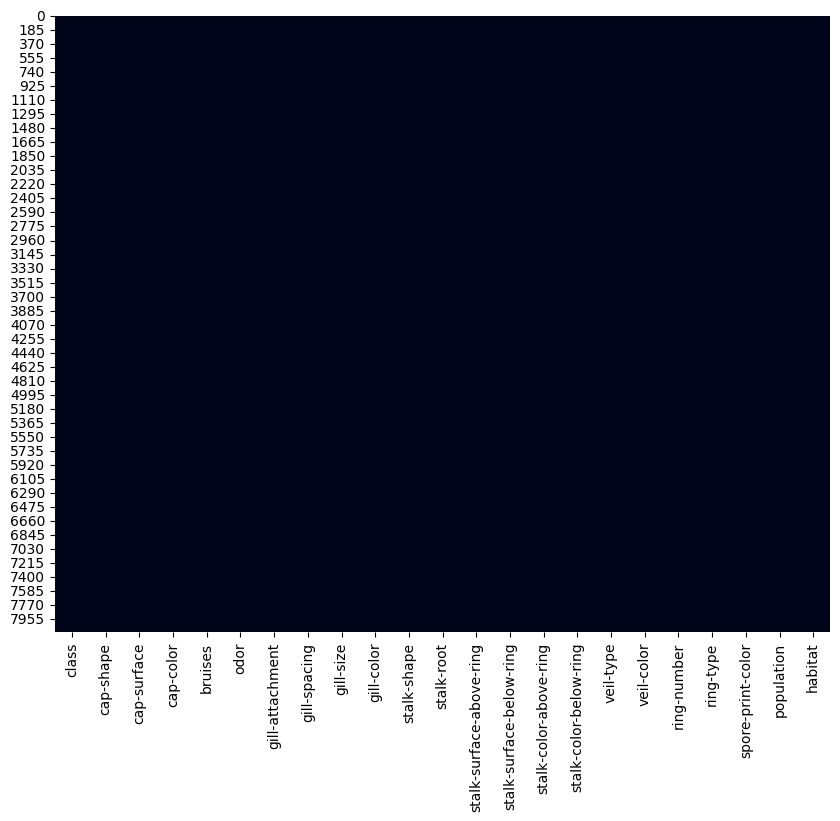

Количество пропусков в каждом столбце:


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

print("Количество пропусков в каждом столбце:")
data.isnull().sum()

In [10]:
data_nan_search = data.iloc[:, 1:]
for col in data_nan_search:
    print('*'*10, f'Признак {col}:', '*'*10)
    print(data[col].value_counts())

********** Признак cap-shape: **********
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
********** Признак cap-surface: **********
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
********** Признак cap-color: **********
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
********** Признак bruises: **********
f    4748
t    3376
Name: bruises, dtype: int64
********** Признак odor: **********
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
********** Признак gill-attachment: **********
f    7914
a     210
Name: gill-attachment, dtype: int64
********** Признак gill-spacing: **********
c    6812
w    1312
Name: gill-spacing, dtype: int64
********** Признак gill-size: **********
b    5612
n    2512
Name: gill-size, dtype: int64
********** Признак gill-color: **********
b    1728
p 

Признак stalk-root имеет значение "?", то есть пропуск, избавимся от этого

In [11]:
data.replace('?', np.nan, inplace=True)
data = data.dropna()

<br>
<font size=3>Одномерный анализ</font><br>
<br>

<b>Посмотрим на распределение таргета в датасете</b>

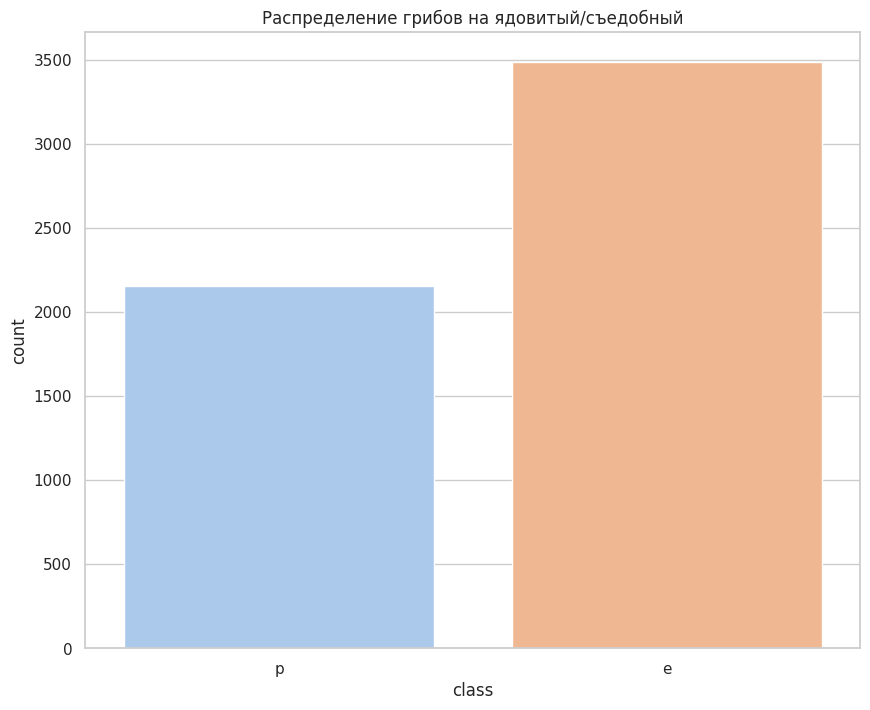

In [13]:
plt.figure(figsize=(10, 8))
plt.title('Распределение грибов на ядовитый/cъедобный')

sns.set_theme(style='whitegrid', palette="pastel")
sns.countplot(x='class', data=data)
plt.show()

Количество съедобных грибов превышает количество ядовитых грибов, большого дисбаланса в таргете нет, поэтому делаем вывод, что целевая переменная сбалансированная.<br>
В реальности съедобных грибов больше, чем ядовитых, поэтому датасет в этом плане сходится с реальностью.

Построим на распределения остальных признаков

In [20]:
data_without_class_1 = data.iloc[:, 1:12] # датасет без признака "class" первая часть
data_without_class_2 = data.iloc[:, 12:] # датасет без признака "class" вторая часть

,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,s,s,w,w,p,w,o,p,k,s,u
1,s,s,w,w,p,w,o,p,n,n,g
2,s,s,w,w,p,w,o,p,n,n,m
3,s,s,w,w,p,w,o,p,k,s,u
4,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...
7986,y,y,n,n,p,w,t,p,w,y,p
8001,y,y,n,n,p,w,t,p,w,y,p
8038,s,s,w,w,p,w,t,p,w,y,p
8095,k,y,c,c,p,w,n,n,w,c,d


In [48]:
def distribution_plot(cols: pd.DataFrame) -> None:
    """
    Функция для построения hist графиков
    :param cols: датафрейм с признаками, по которым будет строится график распределения
    :return: None
    """
    fig, ax = plt.subplots(4, 3, figsize=(25, 20))
    ax = ax.flatten()
    fig.suptitle("Значения в датасете")
    fig.tight_layout(h_pad=3, w_pad=3)
    plt.subplots_adjust(top=0.95)

    sns.set_theme(style='whitegrid', palette="pastel")
    for i in range(len(cols)):
        sns.countplot(ax=ax[i], x=data[cols[i]])

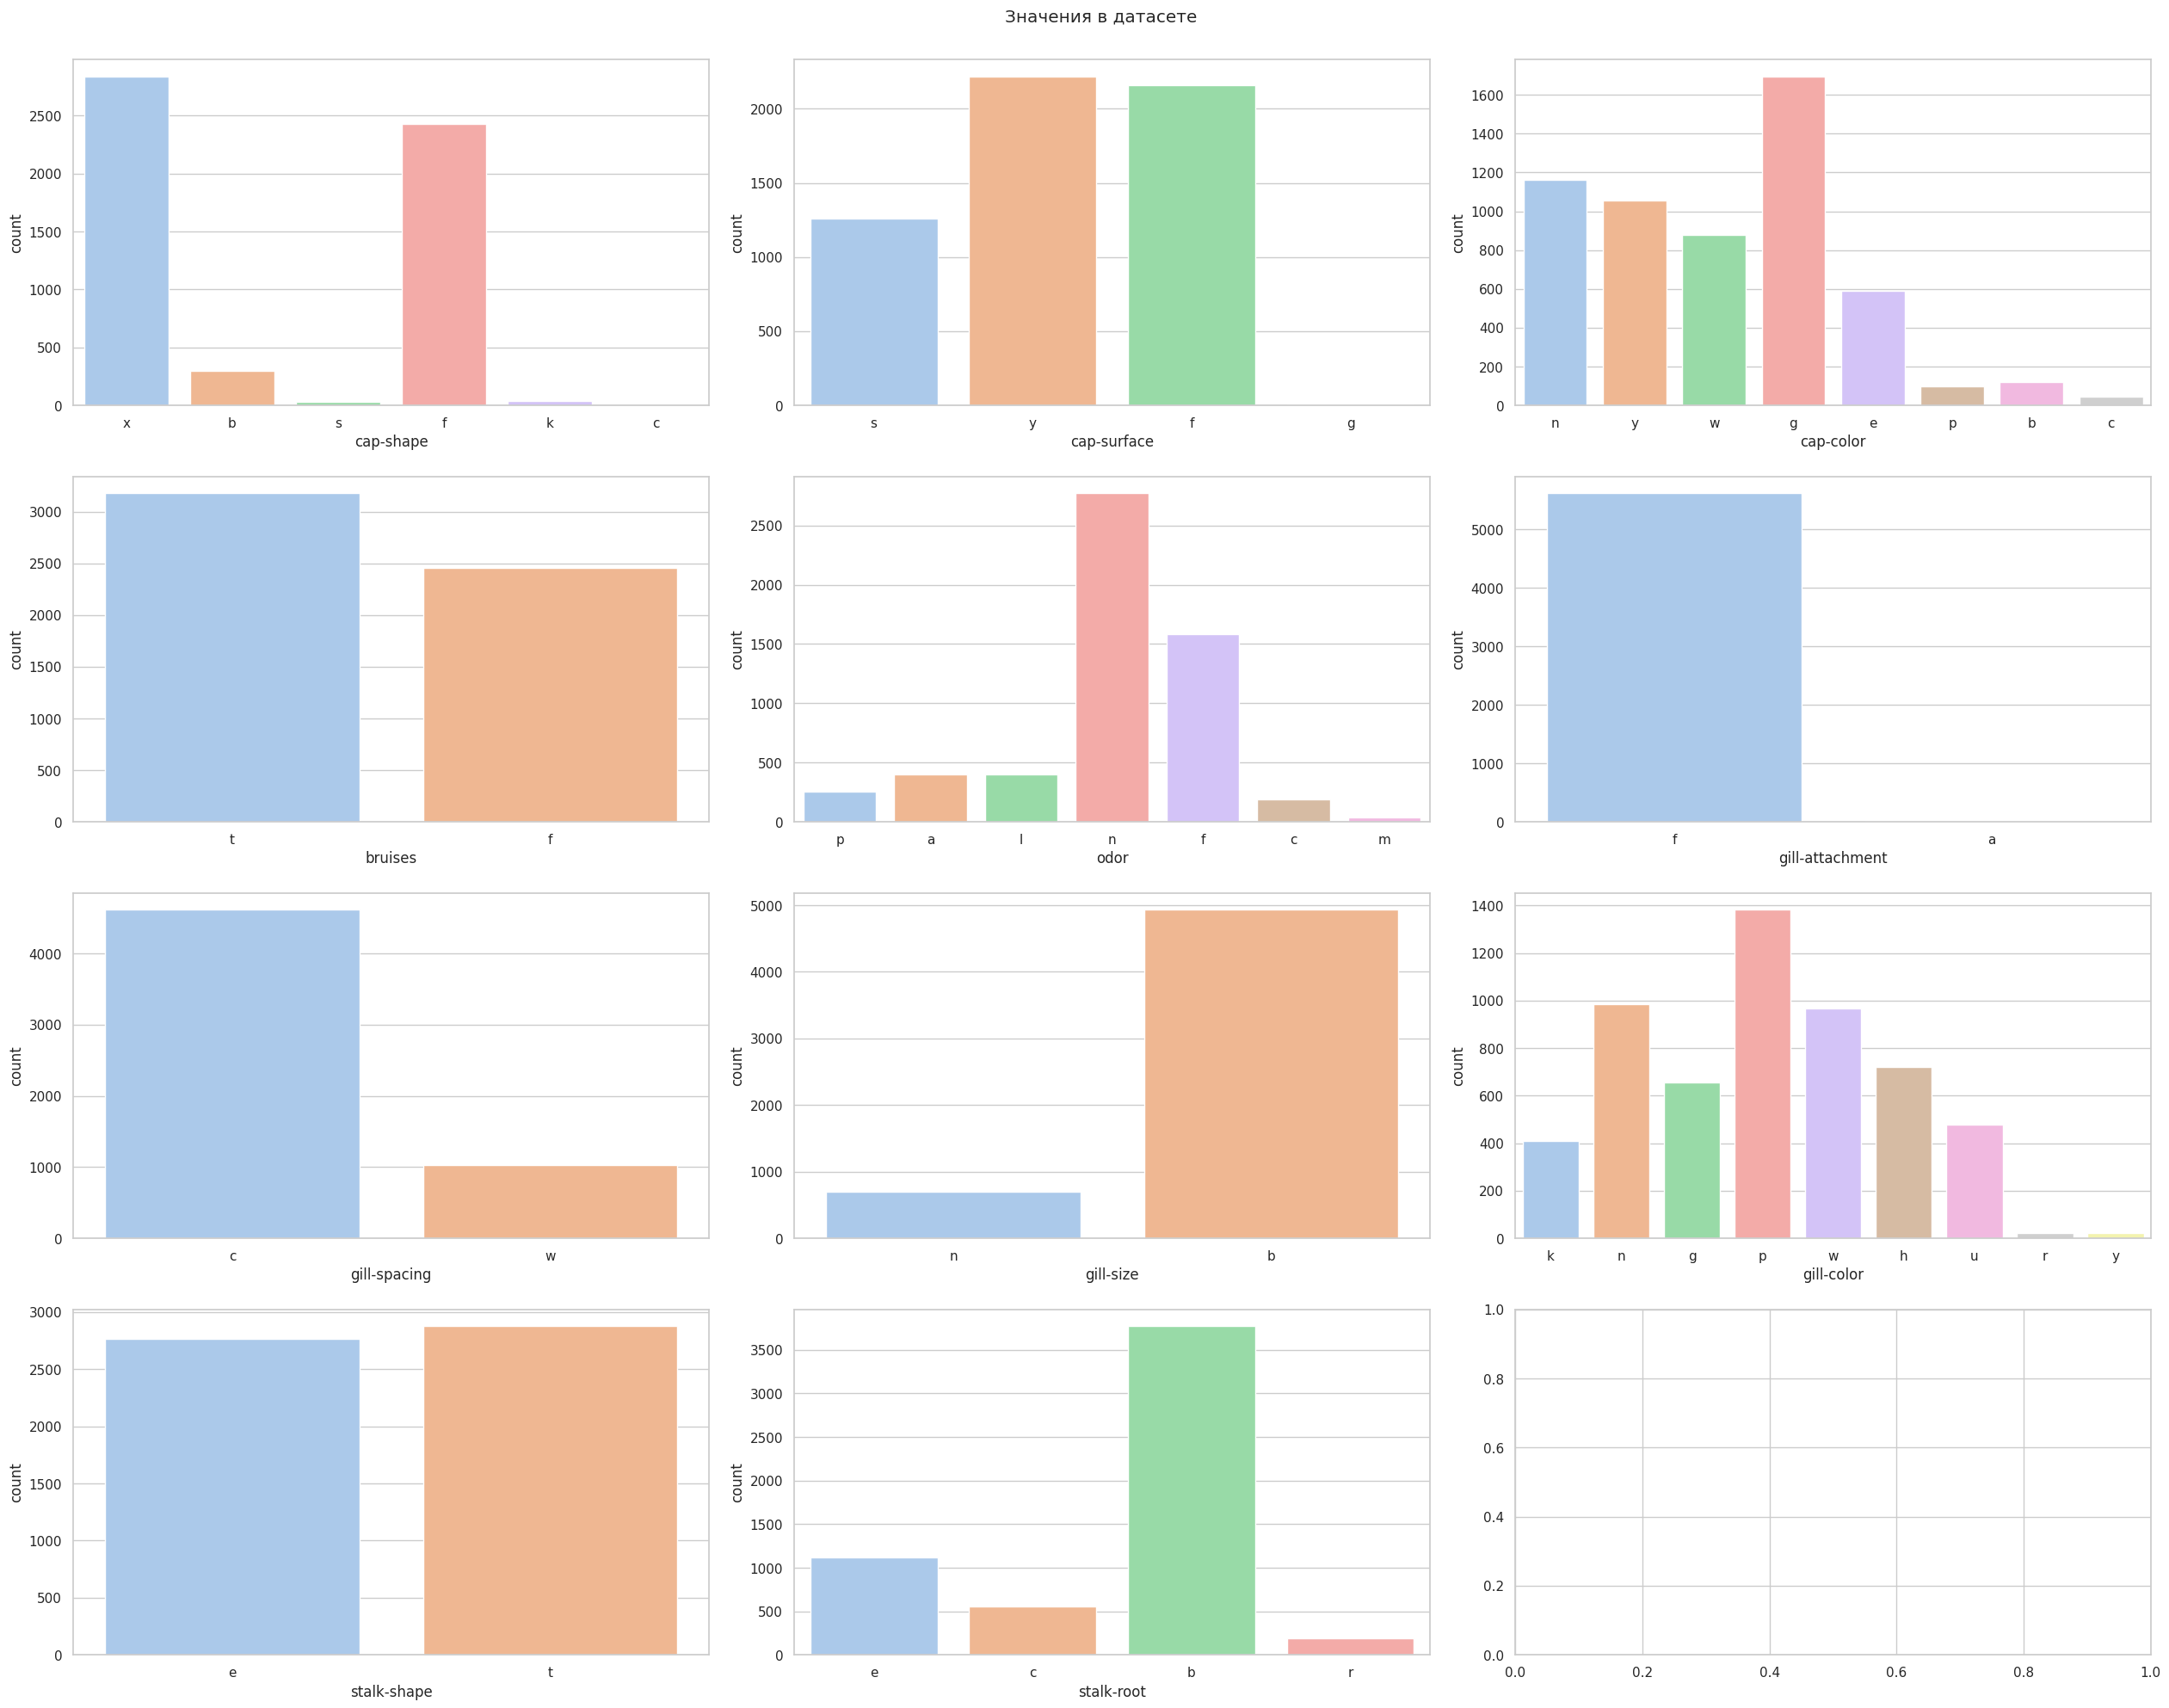

In [49]:
cols = data_without_class_1.columns
distribution_plot(cols)

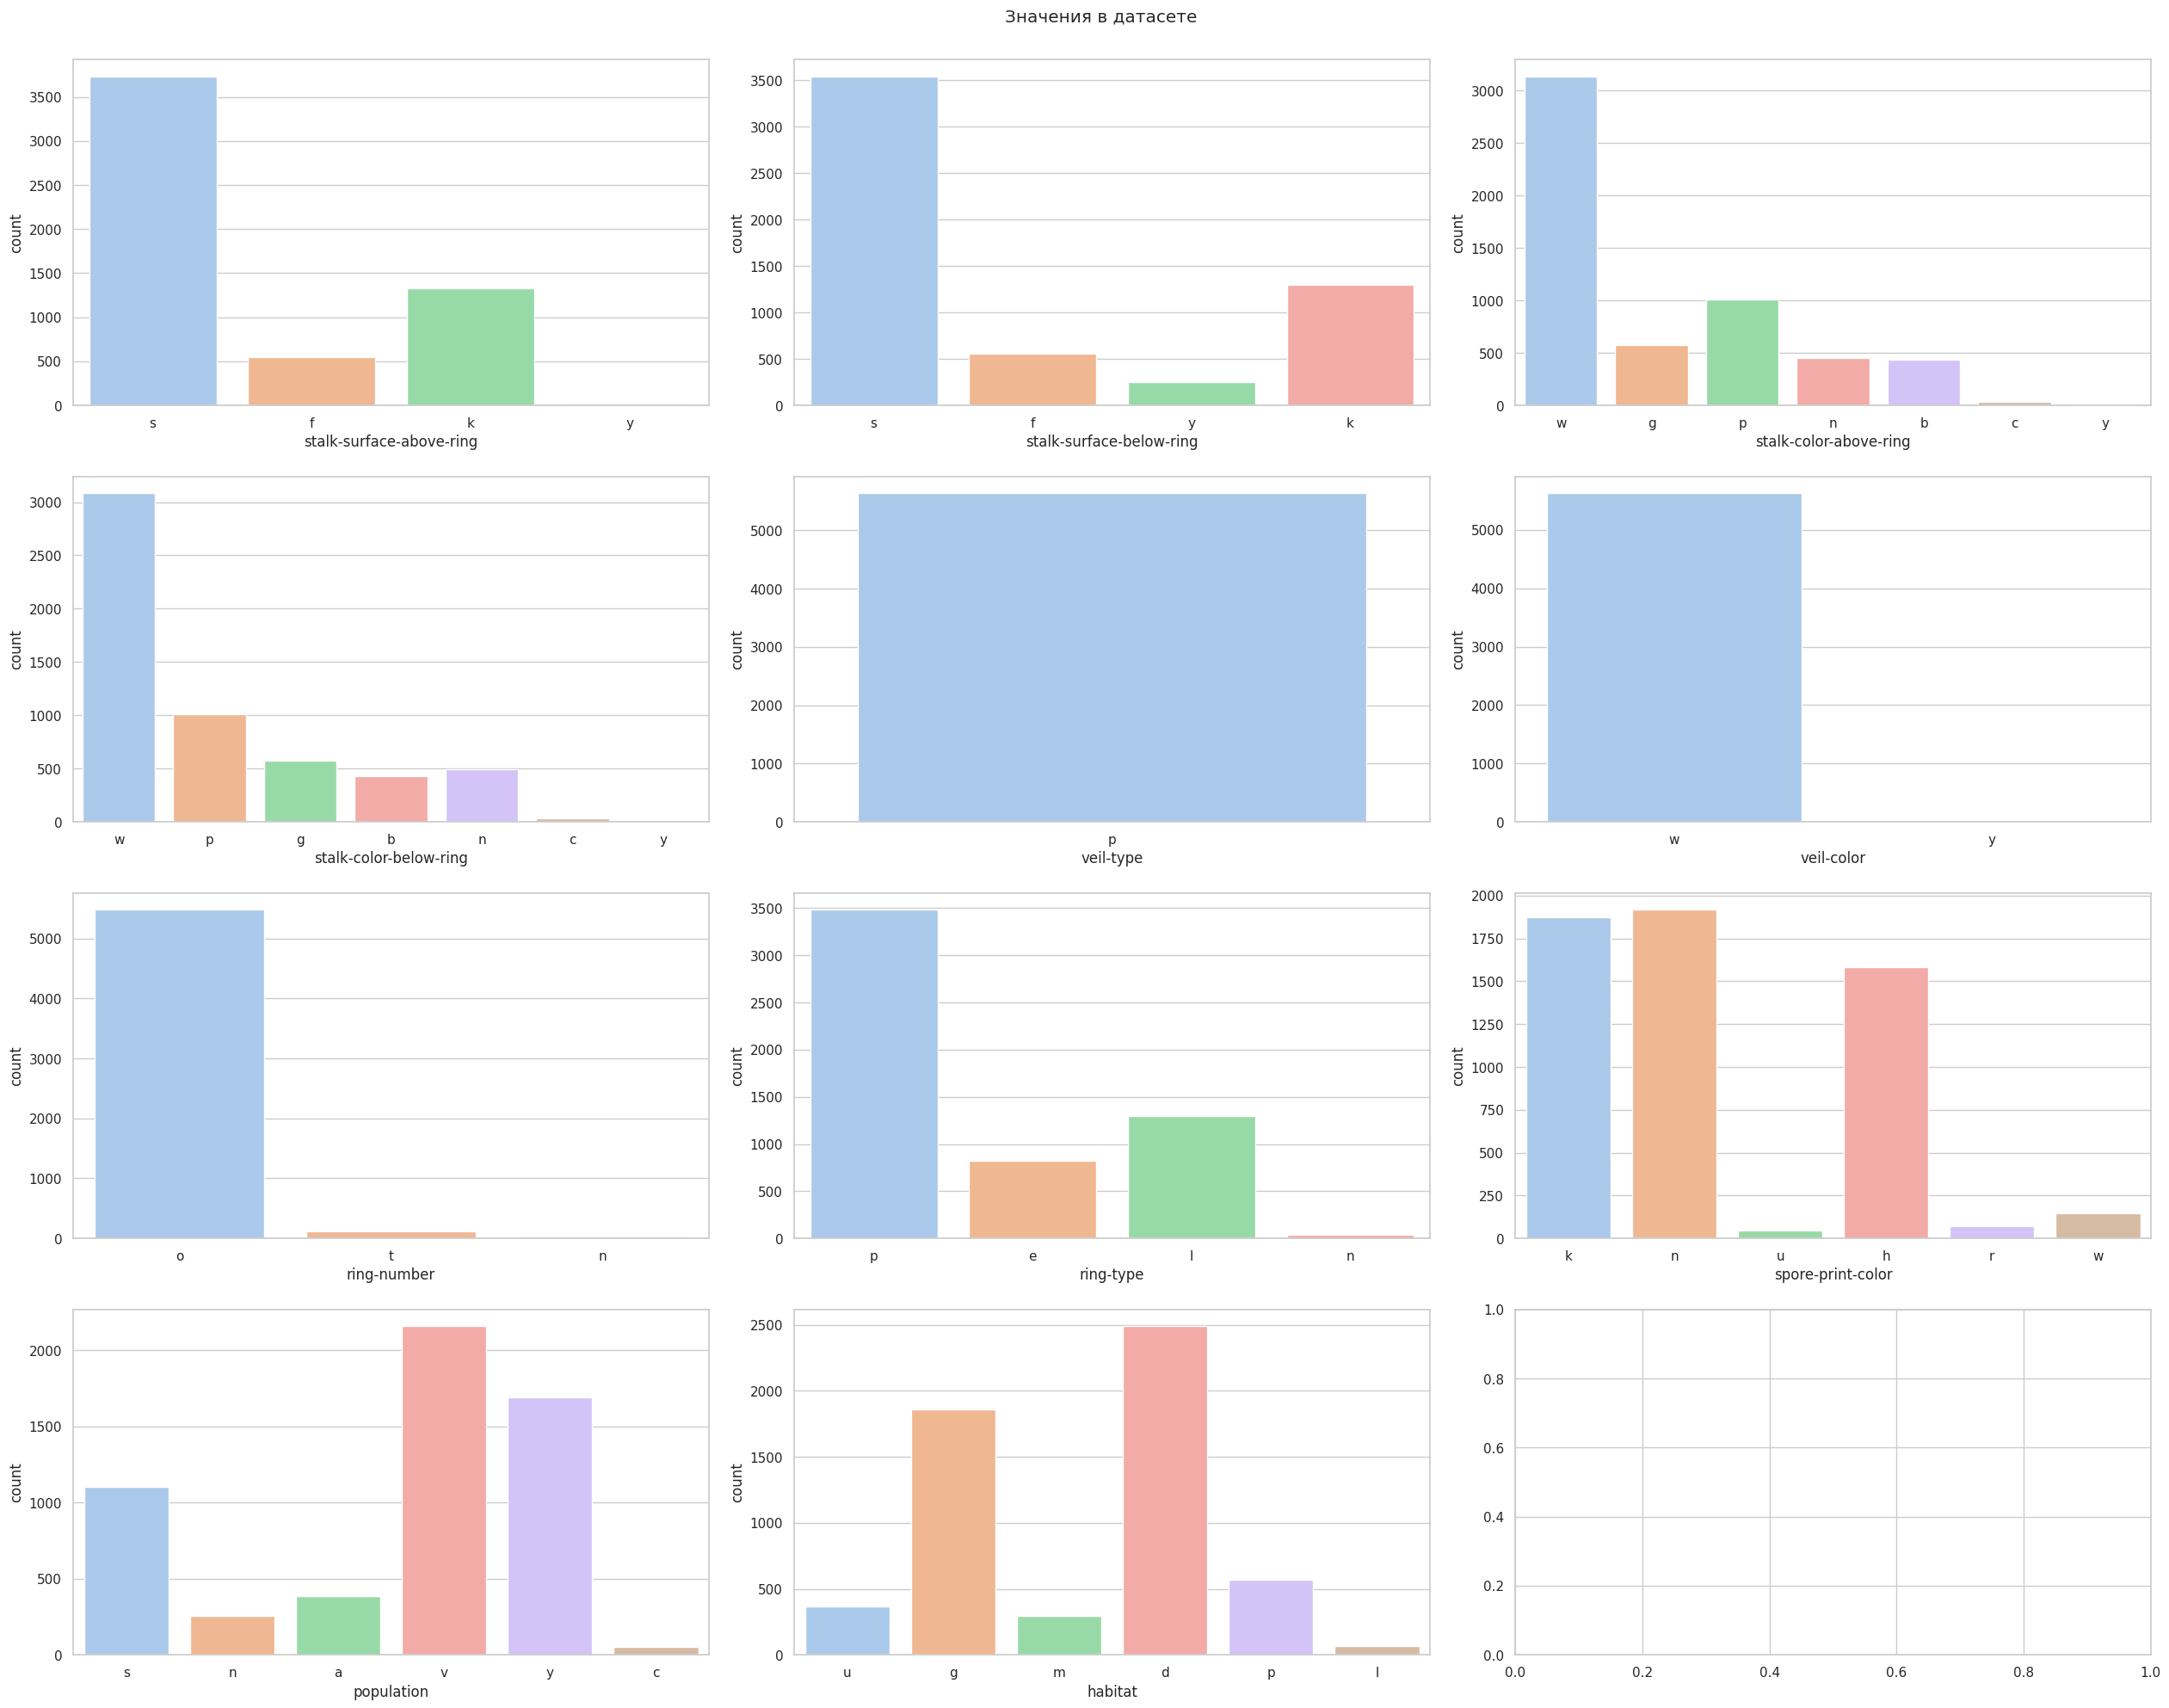

In [50]:
cols = data_without_class_2.columns
distribution_plot(cols)